###1. Importing the Libraries

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')
# !pip install matplotlib

In [2]:
# !pip install seaborn
# !pip install scikit-learn

In [3]:
# !pip install sklearn

In [ ]:
!unzip "/home/ayush22095/IP_Murugan/ip_dataset_all_aug.zip" -d "/home/ayush22095/IP_Murugan/IP_Data_25K"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
import os
import random
# from IPython.display import Image, display
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
  
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


2023-05-09 22:12:33.428760: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 22:12:34.440965: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /device:GPU:0 with 22300 MB memory:  -> device: 0, name: GeForce RTX 3090, pci bus id: 0000:04:00.0, compute capability: 8.6
2023-05-09 22:12:34.449212: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /device:GPU:0 with 22300 MB memory:  -> device: 0, name: GeForce RTX 3090, pci bus id: 0000:04:00.0, compute capability: 8.6


### 1.1 Create a directory to store each set of distinct set of images. The following five datasets are executed to compare the relative performance as follows :-
1. Original Data
2. Contrast Based Augmentation
3. Flip Based Augmentation
4. Noise Based Augmentation
5. Nature Based Augmentation

In [179]:
def make_dir():    
    # Loop through each subfolder in the main folder
    for subfolder_name in os.listdir(main_folder_path):
        subfolder_path = os.path.join(main_folder_path, subfolder_name)
        if os.path.isdir(subfolder_path):
            print('Processing subfolder:', subfolder_name)
            # Get a list of all image file names in the subfolder
            image_file_names = [f for f in os.listdir(subfolder_path) if f.endswith('.jpg')]
            # Split the image file names into train, validation, and test sets
            train_names, test_names = train_test_split(image_file_names, test_size=test_ratio, random_state=random_state, stratify=None)
            #train_names, validation_names = train_test_split(train_names, test_size=validation_ratio/(1-test_ratio), random_state=random_state, stratify=None)
            # Move the image files to the appropriate folders
            for name in train_names:
                src_path = os.path.join(subfolder_path, name)
                dst_path = os.path.join(train_folder, subfolder_name, name)
                os.makedirs(os.path.dirname(dst_path), exist_ok=True)
                shutil.copy(src_path, dst_path)
            #for name in validation_names:
            #     src_path = os.path.join(subfolder_path, name)
            #     #dst_path = os.path.join(validation_folder, subfolder_name, name)
            #     os.makedirs(os.path.dirname(dst_path), exist_ok=True)
            #     shutil.copy(src_path, dst_path)
            for name in test_names:
                src_path = os.path.join(subfolder_path, name)
                dst_path = os.path.join(test_folder, subfolder_name, name)
                os.makedirs(os.path.dirname(dst_path), exist_ok=True)
                shutil.copy(src_path, dst_path)
    print('Done.')

In [180]:

import shutil
from sklearn.model_selection import train_test_split

# Set the main folder path
main_folder_path = '/home/ayush22095/IP_Murugan/IP_DATA/original_images'

new_path  ='IP'

# Set the train, validation, and test ratios
train_ratio = 0.8
test_ratio = 0.2

a = 0
b = 0

# Set the random state for reproducibility
random_state = 42

# Create the train, validation, and test folders
train_folder = os.path.join(new_path, 'IP_Data/Original/train')
test_folder = os.path.join(new_path, 'IP_Data/Original/test')

# Check if the folder already exists in the given directory or not.
if os.path.isdir(train_folder):
    print("The directory already exists.")
    a = 1
else:
    print("The directory does not exist.")
    #os.makedirs(train_folder)

# Check if the folder already exists in the given directory or not.
if os.path.isdir(test_folder):
    print("The directory already exists.")
    b = 1
else:
    print("The directory does not exist.")
    #os.makedirs(test_folder)

if(a==0 and b==0):
  make_dir()

The directory already exists.
The directory already exists.


2. Split to Train and Test Data Set Ratio - 80%-20% ( For CSV Data File ). The Data is now being loaded from the directories generated in the format for loading the Data through the Image Data Generator.

In [4]:
import tensorflow as tf

In [5]:
print(tf.__version__)

2.6.2


In [6]:
from keras import backend as K

In [7]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dropout,Activation
from tensorflow.keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import Model, Sequential
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from PIL import UnidentifiedImageError
from tensorflow.keras.optimizers import Adam

In [185]:
from tensorflow.keras.applications import ResNet50

###2. Generating the Data Sets
The Train, Validation and Test Data Sets in the ratio of 80:20 as the Training Dataset and Test Data split and further the Training Set is split in the ratio of 80:20 in Training and Validation Data Set.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
Train_Datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)
Valid_Datagen = ImageDataGenerator(rescale = 1./255,validation_split = 0.2)
Test_Datagen  = ImageDataGenerator(rescale = 1./255)

In [10]:
Train_Data_Itr = Train_Datagen.flow_from_directory(directory = r'IP/IP_Data/Original/train',
                                                   target_size = (128,128),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 32)

Found 1178 images belonging to 30 classes.


In [11]:
Valid_Data_Itr = Valid_Datagen.flow_from_directory(directory = r'IP/IP_Data/Original/train',
                                                  target_size = (128,128),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 32)

Found 277 images belonging to 30 classes.


In [12]:
Test_Data_Itr = Test_Datagen.flow_from_directory(directory = r'IP/IP_Data/Original/test',
                                                  target_size = (128,128),
                                                  class_mode = 'categorical',
                                                  batch_size = 32)

Found 380 images belonging to 30 classes.


In [13]:
# Define the Datasets, corresponding to the given iterators used to fit the model with the given models and validate the result.
train_Dataset = Train_Data_Itr
valid_Dataset = Valid_Data_Itr
test_Dataset = Test_Data_Itr 

###3. Visualizing the Data Distribution and Samples across the Datasets

In [14]:
# Get the labels through the Train_Data_Iterator to know the key values being used by the given iterator.
Train_Labels = Train_Data_Itr.class_indices.keys()

In [15]:
print(Train_Labels)

dict_keys(['Alpinia Galanga (Rasna)', 'Amaranthus Viridis (Arive-Dantu)', 'Artocarpus Heterophyllus (Jackfruit)', 'Azadirachta Indica (Neem)', 'Basella Alba (Basale)', 'Brassica Juncea (Indian Mustard)', 'Carissa Carandas (Karanda)', 'Citrus Limon (Lemon)', 'Ficus Auriculata (Roxburgh fig)', 'Ficus Religiosa (Peepal Tree)', 'Hibiscus Rosa-sinensis', 'Jasminum (Jasmine)', 'Mangifera Indica (Mango)', 'Mentha (Mint)', 'Moringa Oleifera (Drumstick)', 'Muntingia Calabura (Jamaica Cherry-Gasagase)', 'Murraya Koenigii (Curry)', 'Nerium Oleander (Oleander)', 'Nyctanthes Arbor-tristis (Parijata)', 'Ocimum Tenuiflorum (Tulsi)', 'Piper Betle (Betel)', 'Plectranthus Amboinicus (Mexican Mint)', 'Pongamia Pinnata (Indian Beech)', 'Psidium Guajava (Guava)', 'Punica Granatum (Pomegranate)', 'Santalum Album (Sandalwood)', 'Syzygium Cumini (Jamun)', 'Syzygium Jambos (Rose Apple)', 'Tabernaemontana Divaricata (Crape Jasmine)', 'Trigonella Foenum-graecum (Fenugreek)'])


In [194]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

In [16]:
# Get all the Labels for each training examples in the Train Dataset
train_labels = Train_Data_Itr.classes
test_labels = Test_Data_Itr.classes
val_labels = Valid_Data_Itr.classes

In [17]:
print(train_labels.shape)
print(test_labels.shape)
print(val_labels.shape)

(1178,)
(380,)
(277,)


In [18]:
print(train_labels)
print(test_labels)
print(val_labels)

[ 0  0  0 ... 29 29 29]
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  3
  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8
  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10
 10 10 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12
 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 13 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15
 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17
 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19
 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22
 22 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24

In [198]:
class_indices = Train_Data_Itr.class_indices

In [199]:
class_names = {v: k for k, v in class_indices.items()}

In [200]:
print(class_names)

{0: 'Alpinia Galanga (Rasna)', 1: 'Amaranthus Viridis (Arive-Dantu)', 2: 'Artocarpus Heterophyllus (Jackfruit)', 3: 'Azadirachta Indica (Neem)', 4: 'Basella Alba (Basale)', 5: 'Brassica Juncea (Indian Mustard)', 6: 'Carissa Carandas (Karanda)', 7: 'Citrus Limon (Lemon)', 8: 'Ficus Auriculata (Roxburgh fig)', 9: 'Ficus Religiosa (Peepal Tree)', 10: 'Hibiscus Rosa-sinensis', 11: 'Jasminum (Jasmine)', 12: 'Mangifera Indica (Mango)', 13: 'Mentha (Mint)', 14: 'Moringa Oleifera (Drumstick)', 15: 'Muntingia Calabura (Jamaica Cherry-Gasagase)', 16: 'Murraya Koenigii (Curry)', 17: 'Nerium Oleander (Oleander)', 18: 'Nyctanthes Arbor-tristis (Parijata)', 19: 'Ocimum Tenuiflorum (Tulsi)', 20: 'Piper Betle (Betel)', 21: 'Plectranthus Amboinicus (Mexican Mint)', 22: 'Pongamia Pinnata (Indian Beech)', 23: 'Psidium Guajava (Guava)', 24: 'Punica Granatum (Pomegranate)', 25: 'Santalum Album (Sandalwood)', 26: 'Syzygium Cumini (Jamun)', 27: 'Syzygium Jambos (Rose Apple)', 28: 'Tabernaemontana Divaricata 

In [201]:
train_df = pd.DataFrame(train_labels, columns = ['Label'])
test_df = pd.DataFrame(test_labels, columns = ['Label'])
val_df = pd.DataFrame(val_labels, columns = ['Label'])

In [202]:
class_names.get(0)

'Alpinia Galanga (Rasna)'

In [203]:
def get_sort_count(my_df):
  image_count = my_df["Label"].value_counts()
  # Sort the days by the count
  sort_df = image_count.index.tolist()
  return sort_df

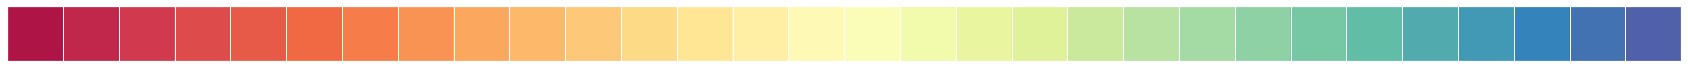

In [204]:
my_colors = sns.color_palette("Spectral", len(class_names))

# Display the colors in the palette
ax = sns.palplot(my_colors)
# Create a custom legend
handles = [plt.plot([],[], marker="o", ls="", color=my_colors[i], label=str(i)+'_'+class_names[k])[0] for i, k in enumerate(class_names)]
# plt.legend(handles=handles, loc="upper left", frameon=False)
# print('The plot for the legend schema is as follows')

In [205]:
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

In [206]:
# fig, ax = plt.subplots(figsize=(35,20))
# sort_df = get_sort_count(train_df)
# sns.set_palette("Spectral")
# ax = sns.countplot(x=train_df['Label'],data= train_df,palette = 'Spectral',saturation=0.5)
# # for x in ax.get_xticklabels():
# #   print(x.get_text())
# # ax.set_xticklabels([class_names.get(x.get_text()) for x in ax.get_xticklabels()],rotation=90)
# ax.set_xlabel('Category of Plants')
# ax.set_ylabel('Count')
# plt.title('Number of Data Samples for each Category of the Plant for Training Dataset')
# plt.legend(handles=handles, loc="upper right", frameon=False)
# # Show the plot
# plt.show()
# plt.tight_layout()

In [207]:
# fig, ax = plt.subplots(figsize=(35,20))
# sort_df = get_sort_count(test_df)
# sns.set_palette("Spectral")
# ax = sns.countplot(x=test_df['Label'],data= test_df,palette = 'Spectral',saturation=0.5)
# # for x in ax.get_xticklabels():
# #   print(x.get_text())
# # ax.set_xticklabels([class_names.get(x.get_text()) for x in ax.get_xticklabels()],rotation=90)
# ax.set_xlabel('Category of Plants')
# ax.set_ylabel('Count')
# plt.title('Number of Data Samples for each Category of the Plant for Testing Dataset')
# plt.legend(handles=handles, loc="upper right", frameon=False)
# # Show the plot
# plt.show()
# plt.tight_layout()

In [208]:
# fig, ax = plt.subplots(figsize=(35,20))
# sort_df = get_sort_count(val_df)
# sns.set_palette("Spectral")
# ax = sns.countplot(x=val_df['Label'],data= val_df,palette = 'Spectral',saturation=0.5)
# # for x in ax.get_xticklabels():
# #   print(x.get_text())
# # ax.set_xticklabels([class_names.get(x.get_text()) for x in ax.get_xticklabels()],rotation=90)
# ax.set_xlabel('Category of Plants')
# ax.set_ylabel('Count')
# plt.title('Number of Data Samples for each Category of the Plant for Testing Dataset')
# plt.legend(handles=handles, loc="upper right", frameon=False)
# # Show the plot
# plt.show()
# plt.tight_layout()

###. 4. Dataset Images Visualisation for both the categories.

In [209]:
len(Train_Data_Itr)

37

In [210]:
data_batch = Train_Data_Itr.next()

In [211]:
images, labels = data_batch

In [212]:
print(labels.shape)

(32, 30)


In [213]:
import shutil

def check_pil(DIR):
  error = []

  classes = os.listdir(DIR)

  for each_class in classes:
    dirpath = os.path.join(DIR, each_class)

    images = os.listdir(dirpath)
    for each_image in images:
      imagepath = os.path.join(dirpath, each_image)

      try:
        img = Image.open(imagepath)
      except:
        shutil.rmtree(imagepath, ignore_errors=True)
        error.append((each_class, each_image))

  return error

In [214]:
os.listdir('IP/IP_Data/Original/train/Amaranthus Viridis (Arive-Dantu)')

['AV-S-108.jpg',
 'AV-S-020.jpg',
 'AV-S-041.jpg',
 'AV-S-109.jpg',
 'AV-S-104.jpg',
 'AV-S-034.jpg',
 'AV-S-074.jpg',
 'AV-S-084.jpg',
 'AV-S-061.jpg',
 'AV-S-064.jpg',
 'AV-S-025.jpg',
 'AV-S-039.jpg',
 'AV-S-046.jpg',
 'AV-S-036.jpg',
 'AV-S-103.jpg',
 'AV-S-116.jpg',
 'AV-S-080.jpg',
 'AV-S-043.jpg',
 'AV-S-094.jpg',
 'AV-S-066.jpg',
 'AV-S-098.jpg',
 'AV-S-099.jpg',
 'AV-S-033.jpg',
 'AV-S-045.jpg',
 'AV-S-110.jpg',
 'AV-S-006.jpg',
 'AV-S-028.jpg',
 'AV-S-089.jpg',
 'AV-S-075.jpg',
 'AV-S-017.jpg',
 'AV-S-019.jpg',
 'AV-S-038.jpg',
 'AV-S-113.jpg',
 'AV-S-013.jpg',
 'AV-S-093.jpg',
 'AV-S-067.jpg',
 'AV-S-024.jpg',
 'AV-S-087.jpg',
 'AV-S-086.jpg',
 'AV-S-078.jpg',
 'AV-S-032.jpg',
 'AV-S-117.jpg',
 'AV-S-044.jpg',
 'AV-S-031.jpg',
 'AV-S-057.jpg',
 'AV-S-048.jpg',
 'AV-S-118.jpg',
 'AV-S-105.jpg',
 'AV-S-023.jpg',
 'AV-S-004.jpg',
 'AV-S-060.jpg',
 'AV-S-107.jpg',
 'AV-S-008.jpg',
 'AV-S-076.jpg',
 'AV-S-005.jpg',
 'AV-S-029.jpg',
 'AV-S-047.jpg',
 'AV-S-021.jpg',
 'AV-S-015.jpg

In [215]:
errors = check_pil('IP/IP_Data/Original/train')

In [216]:
errors

[]

In [217]:
images[0].shape

(128, 128, 3)

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  .

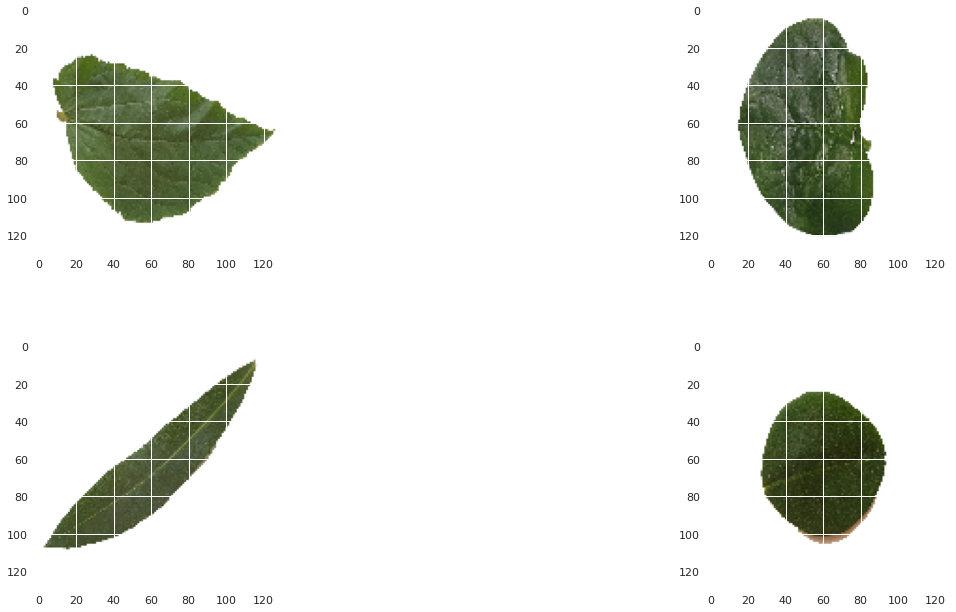

In [218]:
rows = 2
columns = 2
# Get the Plot for 5 Rows and 5 Columns
fig, axes = plt.subplots(rows,columns)
for r in range(rows):
    for c in range(columns):
        # Get the next image in the batch ( Get the cth Image - As the batch size is 64, hence here we consider only a single batch.)
        data_batch = Train_Data_Itr.next()
        # Get the image ----- Convert to numpy array to view the image.
        print(data_batch[0][c])
        image = data_batch[0][c]
        img = np.array(image)
        # Get the Label
        #label = label_batch[0]
        # Plot the Image
        axes[r,c].imshow(img)

        #axes[r,c].title.set_text(txt)
        # Set the title for the image
# Set the Size of the Figure.
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
fig.set_size_inches(20,10)

7. Defining the Evaluation Metrics as Accuracy, Loss, Precision, Recall and F-1 Score and Set the Hyper-Parameters.

In [219]:
tf.keras.backend.clear_session()

In [220]:
# Define the F-1 Score as Evaluation Metric
# Reference - 
def get_f1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [221]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
      get_f1_score
]

In [222]:
# Reduce learning rate when a metric has stopped improving.
# Often waits for patience no. of Epochs before reducing the Learning Rate.
# Recue the Learning Rate by 'factor'/.
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 10,verbose = 1,factor = 0.50, min_lr = 1e-10)
mcp = ModelCheckpoint('model.h5')
es = EarlyStopping(verbose=1, patience=10)

In [223]:
# tf.keras.optimizers.Adam(learning_rate=0.0001, name="adam")





###5. Defining the Models

### MODEL-1 ( EfficientNetB4 )

In [224]:
# model_base=tf.keras.applications.EfficientNetB4()

In [225]:
# modelEfficientNet=Sequential()
# modelEfficientNet.add(model_base)
# modelEfficientNet.add(Dropout(0.5))
# modelEfficientNet.add(Flatten())
# modelEfficientNet.add(BatchNormalization())
# modelEfficientNet.add(Dense(32,kernel_initializer='he_uniform'))
# modelEfficientNet.add(BatchNormalization())
# modelEfficientNet.add(Activation('relu'))
# modelEfficientNet.add(Dense(30,activation='sigmoid'))

In [226]:

# modelEfficientNet.summary()

### Model - 2 ( ResNet50, Pre-Trained on ImageNet - Use Transfer Learning )

In [227]:
# Use ResNet
base_model = tf.keras.applications.ResNet50(input_shape=(128,128,3),include_top=False)

In [228]:
# Freezing Layers
for layer in base_model.layers[:-4]:
    layer.trainable=False

In [229]:
modelRes=Sequential()
modelRes.add(base_model)
modelRes.add(Dropout(0.5))
modelRes.add(Flatten())
modelRes.add(BatchNormalization())
modelRes.add(Dense(32,kernel_initializer='he_uniform'))
modelRes.add(BatchNormalization())
modelRes.add(Activation('relu'))
modelRes.add(Dense(30,activation='sigmoid'))

In [230]:
modelRes.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 2048)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32768)             131072    
_________________________________________________________________
dense (Dense)                (None, 32)                1048608   
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
activation (Activation)      (None, 32)                0

### Model - 3 ( VGG19, Pre-Trained on ImageNet - Use Transfer Learning )

In [231]:
#print(modelVGG.summary())

In [232]:
vgg19 = tf.keras.applications.VGG19(weights = 'imagenet',include_top = False,input_shape = (128, 128, 3))

In [233]:
modelVGG=Sequential()
modelVGG.add(vgg19)
modelVGG.add(Dropout(0.5))
modelVGG.add(Flatten())
modelVGG.add(BatchNormalization())
modelVGG.add(Dense(32,kernel_initializer='he_uniform'))
modelVGG.add(BatchNormalization())
modelVGG.add(Activation('relu'))
modelVGG.add(Dense(30,activation='sigmoid'))

In [234]:
#vgg19.summary()

### Model - 4 ( InceptionV3, Pre-Trained on 'ImageNet' )

In [235]:
InceptionV3 = tf.keras.applications.InceptionV3(weights = 'imagenet',include_top = False,input_shape = (128, 128, 3))

In [236]:
modelInceptionV3=Sequential()
modelInceptionV3.add(InceptionV3)
modelInceptionV3.add(Dropout(0.5))
modelInceptionV3.add(Flatten())
modelInceptionV3.add(BatchNormalization())
modelInceptionV3.add(Dense(32,kernel_initializer='he_uniform'))
modelInceptionV3.add(BatchNormalization())
modelInceptionV3.add(Activation('relu'))
modelInceptionV3.add(Dense(30,activation='sigmoid'))

In [237]:
#InceptionV3.summary()

In [238]:
#print(modelInceptionV3.summary())

### Model-5 ( Xception,Pre-Trained on 'ImageNet')

In [239]:
Xception = tf.keras.applications.Xception(weights = 'imagenet',include_top = False,input_shape = (128, 128, 3))

In [240]:
modelXception=Sequential()
modelXception.add(Xception)
modelXception.add(Dropout(0.5))
modelXception.add(Flatten())
modelXception.add(BatchNormalization())
modelXception.add(Dense(32,kernel_initializer='he_uniform'))
modelXception.add(BatchNormalization())
modelXception.add(Activation('relu'))
modelXception.add(Dense(30,activation='sigmoid'))

In [241]:
#Xception.summary()

In [242]:
print(modelXception.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 4, 4, 2048)        20861480  
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 2048)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
batch_normalization_104 (Bat (None, 32768)             131072    
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1048608   
_________________________________________________________________
batch_normalization_105 (Bat (None, 32)                128       
_________________________________________________________________
activation_97 (Activation)   (None, 32)               

### Model-6 ( EfficientNetV2L,Pre-Trained on 'ImageNet')


In [243]:
# ENV2L_base_model = tf.keras.applications.EfficientNetV2L(
#     include_top=True,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=None,
#     pooling=None,
#     classes=1000,
#     classifier_activation="softmax",
#     include_preprocessing=True
# )

In [244]:
# model_EfficientNetV2L=Sequential()
# model_EfficientNetV2L.add(ENV2L_base_model)
# model_EfficientNetV2L.add(Dropout(0.5))
# model_EfficientNetV2L.add(Flatten())
# model_EfficientNetV2L.add(BatchNormalization())
# model_EfficientNetV2L.add(Dense(32,kernel_initializer='he_uniform'))
# model_EfficientNetV2L.add(BatchNormalization())
# model_EfficientNetV2L.add(Activation('relu'))
# model_EfficientNetV2L.add(Dense(30,activation='sigmoid'))

In [245]:
# model_EfficientNetV2L.summary()

### Model-7 ( NASNETLarge,Pre-Trained on 'ImageNet')


In [246]:
# Use ResNet
NAS_base_model =tf.keras.applications.NASNetLarge(
    input_shape=None,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000
)

In [247]:
modelNAS=Sequential()
modelNAS.add(NAS_base_model)
modelNAS.add(Dropout(0.5))
modelNAS.add(Flatten())
modelNAS.add(BatchNormalization())
modelNAS.add(Dense(32,kernel_initializer='he_uniform'))
modelNAS.add(BatchNormalization())
modelNAS.add(Activation('relu'))
modelNAS.add(Dense(30,activation='sigmoid'))

In [248]:
modelNAS.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Functional)          (None, 1000)              88949818  
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)              0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1000)              0         
_________________________________________________________________
batch_normalization_106 (Bat (None, 1000)              4000      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                32032     
_________________________________________________________________
batch_normalization_107 (Bat (None, 32)                128       
_________________________________________________________________
activation_358 (Activation)  (None, 32)               

### 5.1 Compiling the Models.

In [249]:
# modelEfficientNet.compile(loss='categorical_crossentropy', optimizer='adam',metrics=METRICS)

In [250]:
modelNAS.compile(optimizer='adam', loss='categorical_crossentropy',metrics=METRICS)

In [251]:
modelRes.compile(loss='categorical_crossentropy', optimizer='adam',metrics=METRICS)

In [252]:
modelVGG.compile(optimizer='adam', loss='categorical_crossentropy',metrics=METRICS)

In [253]:
modelInceptionV3.compile(optimizer='adam', loss='categorical_crossentropy',metrics=METRICS)

In [254]:
modelXception.compile(optimizer='adam', loss='categorical_crossentropy',metrics=METRICS)

In [255]:
# model_EfficientNetV2L.compile(loss='categorical_crossentropy', optimizer='adam',metrics=METRICS)

### 10. Training the Models ( Fit the Models ) 

In [256]:
tf.config.run_functions_eagerly(False)

In [257]:
# !pip install pydot

Defaulting to user installation because normal site-packages is not writeable


In [258]:
# !pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


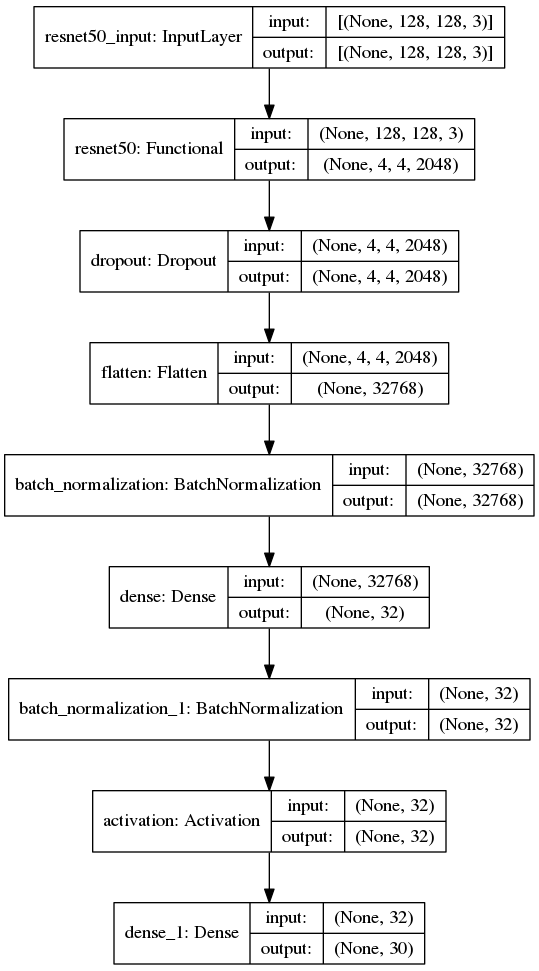

In [259]:
from keras.utils.vis_utils import plot_model
plot_model(modelRes, to_file='modelRes_plot.png', show_shapes=True, show_layer_names=True)

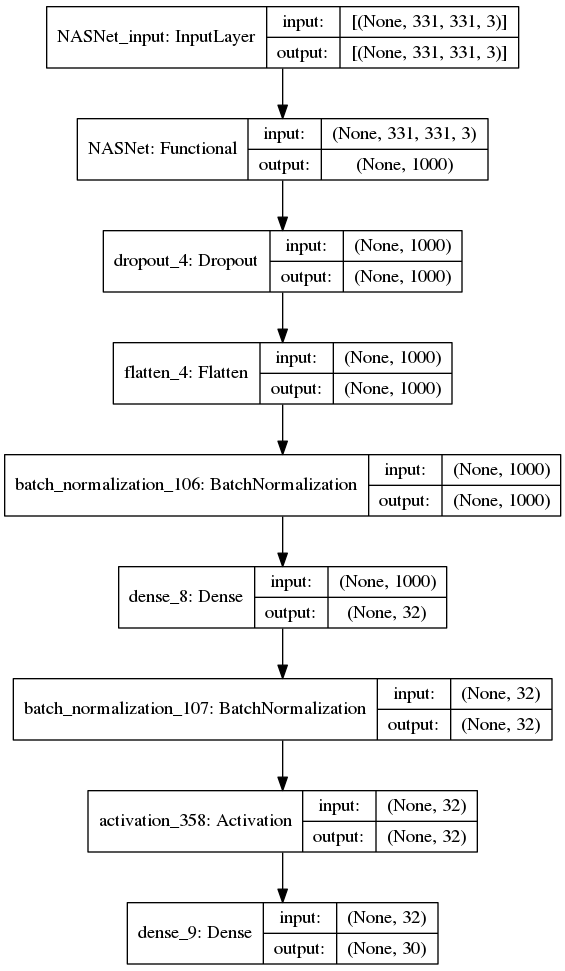

In [260]:
from keras.utils.vis_utils import plot_model
plot_model(modelNAS, to_file='model_plot_NAS.png', show_shapes=True, show_layer_names=True)

In [261]:
# from keras.utils.vis_utils import plot_model
# plot_model(model_EfficientNetV2L, to_file='model_EffV2L_plot.png', show_shapes=True, show_layer_names=True)

In [262]:
# from keras.utils.vis_utils import plot_model
# plot_model(modelEfficientNet, to_file='model_plot_Eff.png', show_shapes=True, show_layer_names=True)

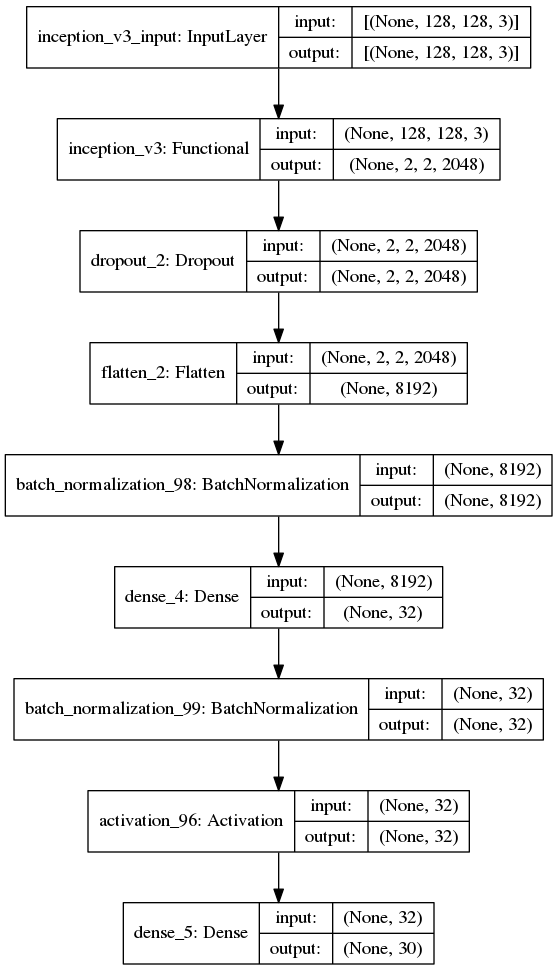

In [263]:
from keras.utils.vis_utils import plot_model
plot_model(modelInceptionV3, to_file='model_plot_Inception.png', show_shapes=True, show_layer_names=True)

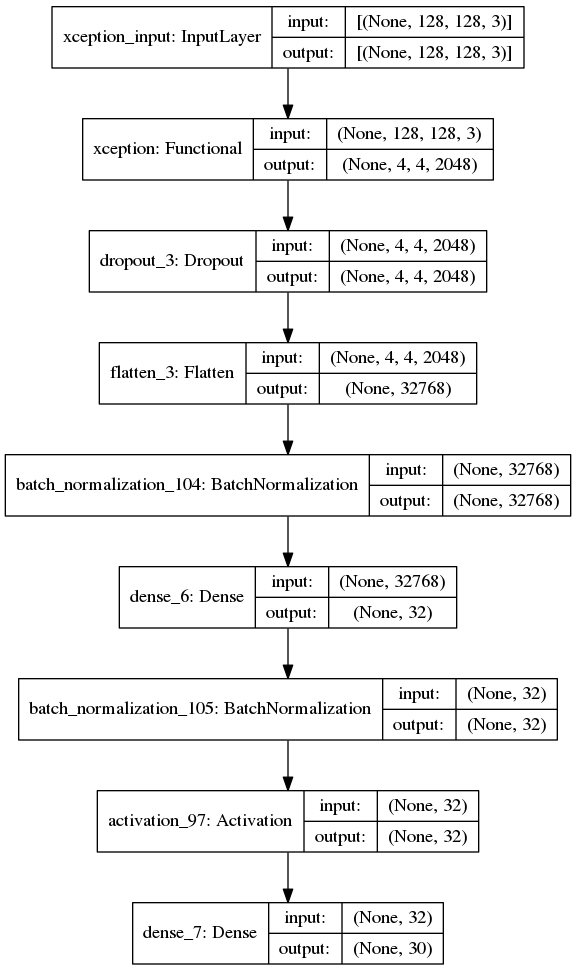

In [264]:
from keras.utils.vis_utils import plot_model
plot_model(modelXception, to_file='model_plot_Xception.png', show_shapes=True, show_layer_names=True)

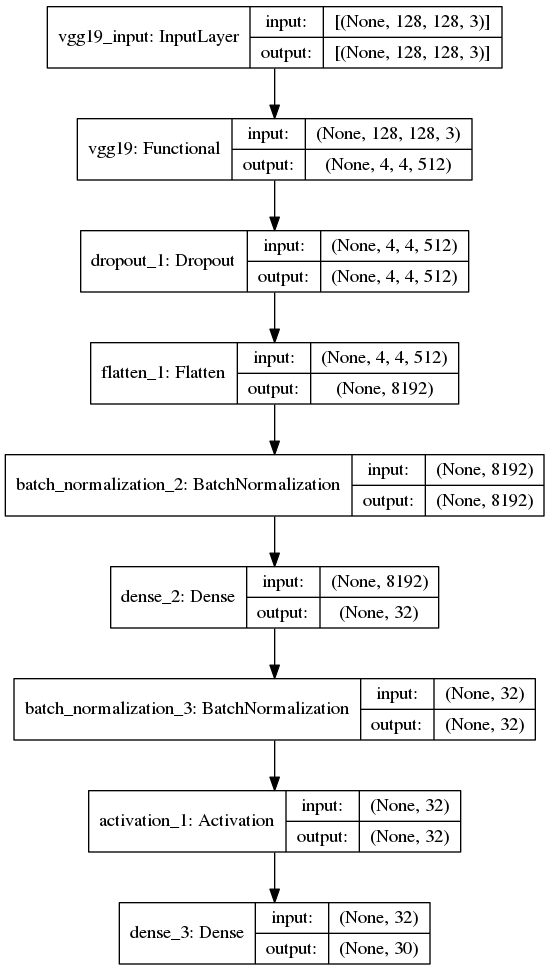

In [265]:
from keras.utils.vis_utils import plot_model
plot_model(modelVGG, to_file='model_plot_VGG.png', show_shapes=True, show_layer_names=True)

###5.2 Fit the Deep Learning Models

In [266]:
from PIL import Image

In [267]:
# List of History
hist_list = []

In [268]:
historyNAS=modelNAS.fit(train_Dataset,validation_data=valid_Dataset,epochs = 30,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/30


2023-05-09 16:25:28.285592: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201
2023-05-09 16:25:32.408461: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


37/37 [==============================] - 104s 2s/step - loss: 3.4379 - accuracy: 0.5009 - precision: 0.0404 - recall: 0.6146 - auc: 0.5760 - get_f1_score: 0.0761 - val_loss: 3.3862 - val_accuracy: 0.6001 - val_precision: 0.0475 - val_recall: 0.5776 - val_auc: 0.6053 - val_get_f1_score: 0.0879


/share/apps/software/anaconda3/envs/py3.9/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
37/37 [==============================] - 47s 1s/step - loss: 3.2442 - accuracy: 0.5572 - precision: 0.0460 - recall: 0.6222 - auc: 0.6353 - get_f1_score: 0.0858 - val_loss: 3.3918 - val_accuracy: 0.6202 - val_precision: 0.0405 - val_recall: 0.4585 - val_auc: 0.5411 - val_get_f1_score: 0.0757
Epoch 3/30
37/37 [==============================] - 47s 1s/step - loss: 3.0123 - accuracy: 0.5993 - precision: 0.0578 - recall: 0.7199 - auc: 0.7240 - get_f1_score: 0.1070 - val_loss: 3.3979 - val_accuracy: 0.5625 - val_precision: 0.0336 - val_recall: 0.4368 - val_auc: 0.5048 - val_get_f1_score: 0.0631
Epoch 4/30
37/37 [==============================] - 47s 1s/step - loss: 2.8485 - accuracy: 0.6160 - precision: 0.0631 - recall: 0.7598 - auc: 0.7652 - get_f1_score: 0.1167 - val_loss: 3.3871 - val_accuracy: 0.5363 - val_precision: 0.0389 - val_recall: 0.5451 - val_auc: 0.5626 - val_get_f1_score: 0.0733
Epoch 5/30
37/37 [==============================] - 48s 1s/step - loss: 2.7145 - accurac

In [269]:
modelNAS.save('IP/IP_Data/Original/modelNAS.h5')
hist_list.append(historyNAS)

In [270]:
# historyENV2L=model_EfficientNetV2L.fit(train_Dataset,validation_data=valid_Dataset,epochs = 30,verbose = 1,callbacks=[lrd,mcp,es])

In [271]:
# model_EfficientNetV2L.save('IP/IP_Data/Original/modelENV2L.h5')
# hist_list.append(historyENV2L)

In [272]:
# historyEff = modelEfficientNet.fit(train_Dataset,validation_data=valid_Dataset,epochs = 30)

In [273]:
# hist_list.append(historyEff)
# tf.saved_model.save(modelEfficientNet,'/content/drive/MyDrive/IP/IP_Data/Original/EfficientNet')

In [274]:
historyResNet=modelRes.fit(train_Dataset,validation_data=valid_Dataset,epochs = 20,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/20
37/37 [==============================] - 56s 1s/step - loss: 2.5548 - accuracy: 0.5922 - precision: 0.0603 - recall: 0.7698 - auc: 0.7632 - get_f1_score: 0.1186 - val_loss: 3.0923 - val_accuracy: 0.6262 - val_precision: 0.0728 - val_recall: 0.8700 - val_auc: 0.8401 - val_get_f1_score: 0.1344
Epoch 2/20
37/37 [==============================] - 47s 1s/step - loss: 1.8901 - accuracy: 0.6314 - precision: 0.0806 - recall: 0.9660 - auc: 0.9430 - get_f1_score: 0.1489 - val_loss: 2.8908 - val_accuracy: 0.6750 - val_precision: 0.0800 - val_recall: 0.8339 - val_auc: 0.8456 - val_get_f1_score: 0.1465
Epoch 3/20
37/37 [==============================] - 47s 1s/step - loss: 1.6005 - accuracy: 0.6840 - precision: 0.0938 - recall: 0.9788 - auc: 0.9625 - get_f1_score: 0.1714 - val_loss: 2.6383 - val_accuracy: 0.7231 - val_precision: 0.0863 - val_recall: 0.7617 - val_auc: 0.8250 - val_get_f1_score: 0.1542
Epoch 4/20
37/37 [==============================] - 47s 1s/step - loss: 1.3918 - accurac

In [275]:
modelRes.save('IP/IP_Data/Original/modelRes.h5')
hist_list.append(historyResNet)

In [276]:
historyVGG = modelVGG.fit(train_Dataset,validation_data=valid_Dataset,epochs = 20,callbacks=[lrd,mcp,es])

Epoch 1/20
37/37 [==============================] - 53s 1s/step - loss: 3.6225 - accuracy: 0.6459 - precision: 0.0459 - recall: 0.4866 - auc: 0.6122 - get_f1_score: 0.0647 - val_loss: 1151932.6250 - val_accuracy: 0.5315 - val_precision: 0.0357 - val_recall: 0.5018 - val_auc: 0.5172 - val_get_f1_score: 0.0660
Epoch 2/20
37/37 [==============================] - 47s 1s/step - loss: 3.3907 - accuracy: 0.6132 - precision: 0.0434 - recall: 0.5042 - auc: 0.5864 - get_f1_score: 0.0801 - val_loss: 1314.2628 - val_accuracy: 0.6030 - val_precision: 0.0322 - val_recall: 0.3755 - val_auc: 0.4926 - val_get_f1_score: 0.0593
Epoch 3/20
37/37 [==============================] - 47s 1s/step - loss: 3.2107 - accuracy: 0.6307 - precision: 0.0527 - recall: 0.5934 - auc: 0.6602 - get_f1_score: 0.0969 - val_loss: 71313.7891 - val_accuracy: 0.5460 - val_precision: 0.0358 - val_recall: 0.4874 - val_auc: 0.5183 - val_get_f1_score: 0.0671
Epoch 4/20
37/37 [==============================] - 47s 1s/step - loss: 3.0

In [277]:
modelVGG.save('IP/IP_Data/Original/modelVGG.h5')
hist_list.append(historyVGG)

In [278]:
historyInception=modelInceptionV3.fit(train_Dataset,validation_data=valid_Dataset,epochs = 20,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/20
37/37 [==============================] - 63s 1s/step - loss: 2.6088 - accuracy: 0.5520 - precision: 0.0609 - recall: 0.8632 - auc: 0.8212 - get_f1_score: 0.1026 - val_loss: 7.1044 - val_accuracy: 0.3970 - val_precision: 0.0333 - val_recall: 0.6101 - val_auc: 0.5238 - val_get_f1_score: 0.0628
Epoch 2/20
37/37 [==============================] - 47s 1s/step - loss: 1.4913 - accuracy: 0.5606 - precision: 0.0690 - recall: 0.9754 - auc: 0.9498 - get_f1_score: 0.1292 - val_loss: 2.8267 - val_accuracy: 0.5892 - val_precision: 0.0553 - val_recall: 0.7040 - val_auc: 0.7270 - val_get_f1_score: 0.1026
Epoch 3/20
37/37 [==============================] - 47s 1s/step - loss: 1.0290 - accuracy: 0.6179 - precision: 0.0795 - recall: 0.9898 - auc: 0.9818 - get_f1_score: 0.1475 - val_loss: 1.9007 - val_accuracy: 0.6641 - val_precision: 0.0807 - val_recall: 0.8736 - val_auc: 0.8857 - val_get_f1_score: 0.1485
Epoch 4/20
37/37 [==============================] - 47s 1s/step - loss: 0.7212 - accurac

In [279]:
modelInceptionV3.save('IP/IP_Data/Original/modelInceptionV3.h5')
hist_list.append(historyInception)

In [280]:
historyXception=modelXception.fit(train_Dataset,validation_data=valid_Dataset,epochs = 30,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/30
37/37 [==============================] - 57s 1s/step - loss: 2.3733 - accuracy: 0.6223 - precision: 0.0718 - recall: 0.8660 - auc: 0.8585 - get_f1_score: 0.1159 - val_loss: 3.7279 - val_accuracy: 0.5665 - val_precision: 0.0491 - val_recall: 0.6534 - val_auc: 0.7168 - val_get_f1_score: 0.0912
Epoch 2/30
37/37 [==============================] - 47s 1s/step - loss: 1.2059 - accuracy: 0.6323 - precision: 0.0826 - recall: 0.9924 - auc: 0.9816 - get_f1_score: 0.1528 - val_loss: 1.5436 - val_accuracy: 0.6439 - val_precision: 0.0822 - val_recall: 0.9531 - val_auc: 0.9348 - val_get_f1_score: 0.1514
Epoch 3/30
37/37 [==============================] - 47s 1s/step - loss: 0.7684 - accuracy: 0.6905 - precision: 0.0970 - recall: 0.9975 - auc: 0.9960 - get_f1_score: 0.1772 - val_loss: 1.1666 - val_accuracy: 0.7091 - val_precision: 0.1004 - val_recall: 0.9711 - val_auc: 0.9692 - val_get_f1_score: 0.1833
Epoch 4/30
37/37 [==============================] - 47s 1s/step - loss: 0.4913 - accurac

In [281]:
modelXception.save('IP/IP_Data/Original/modelXception.h5')
hist_list.append(historyXception)

In [282]:
print(hist_list)

[<keras.callbacks.History object at 0x7ff2743774f0>, <keras.callbacks.History object at 0x7ff234383430>, <keras.callbacks.History object at 0x7fec91a35250>, <keras.callbacks.History object at 0x7ff2b2fa21c0>, <keras.callbacks.History object at 0x7fec7bea4430>]


###6. Evaluation Metrics

###6.1 Evalauting on Training and Validation Data

In [283]:
def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1,model_name):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (30,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION of "+model_name)

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['Training', 'Validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['Training', 'Validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['Training', 'Validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['Training', 'Validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['Training', 'Validation'])
    plt.show()
    plt.savefig('IP/{}.png'.format(model_name), bbox_inches='tight')

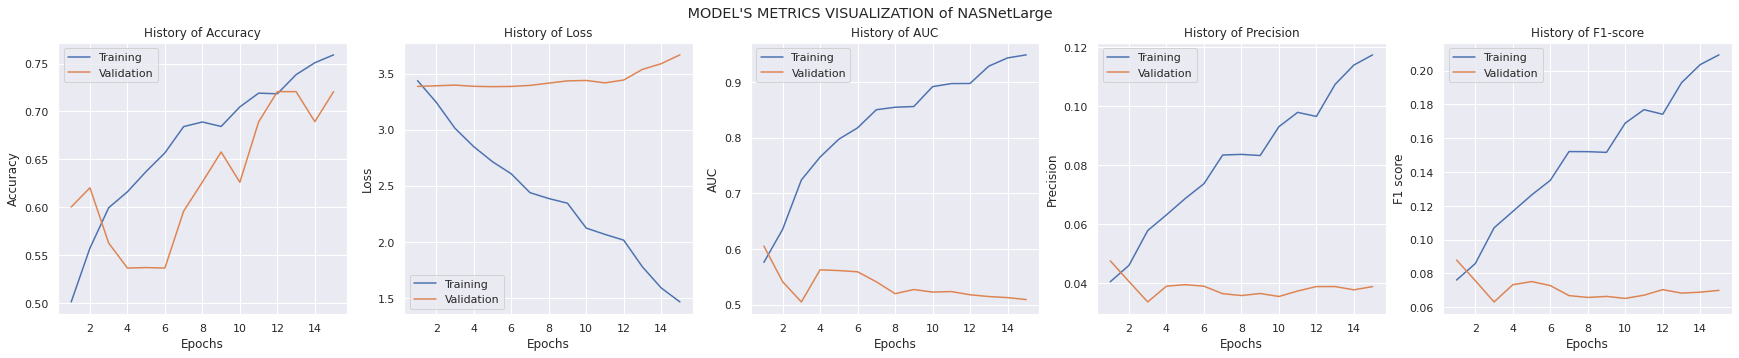

<Figure size 432x288 with 0 Axes>

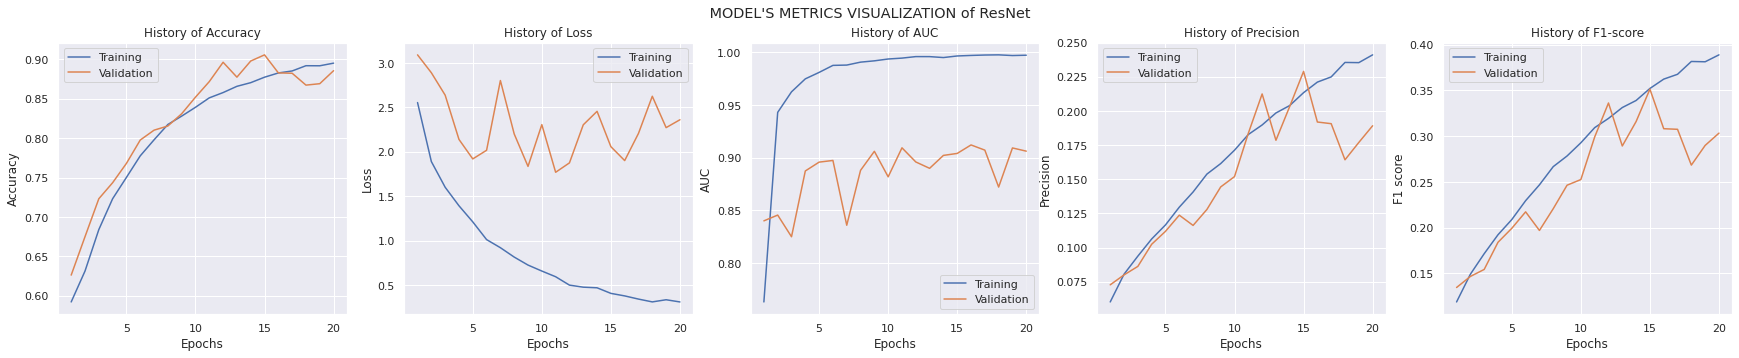

<Figure size 432x288 with 0 Axes>

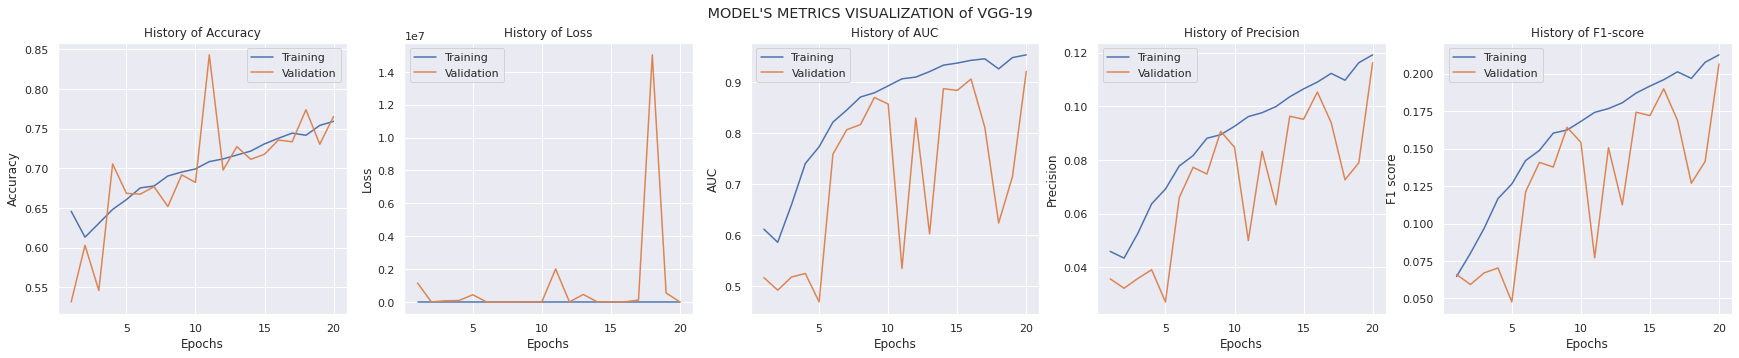

<Figure size 432x288 with 0 Axes>

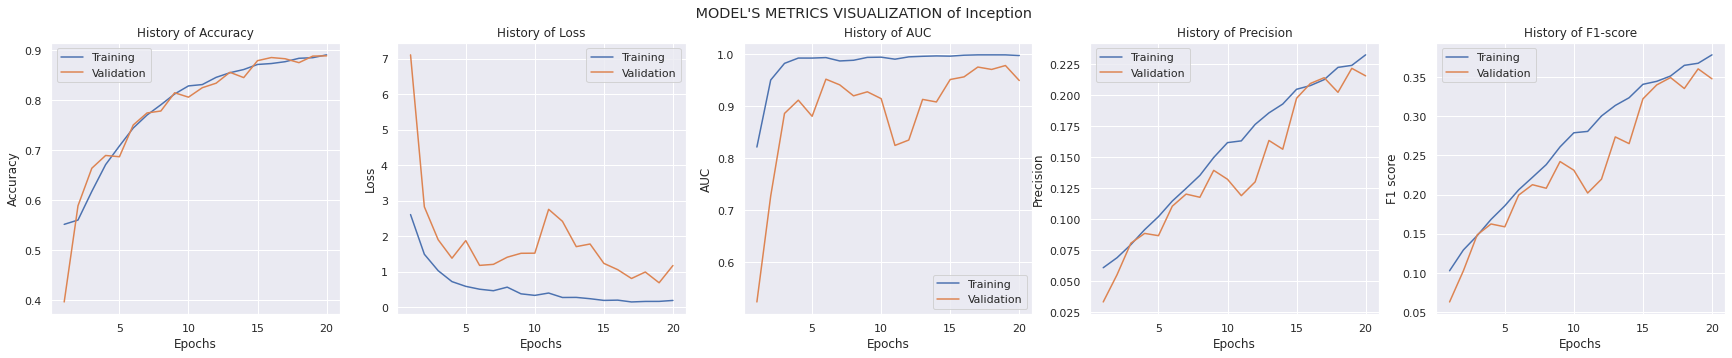

<Figure size 432x288 with 0 Axes>

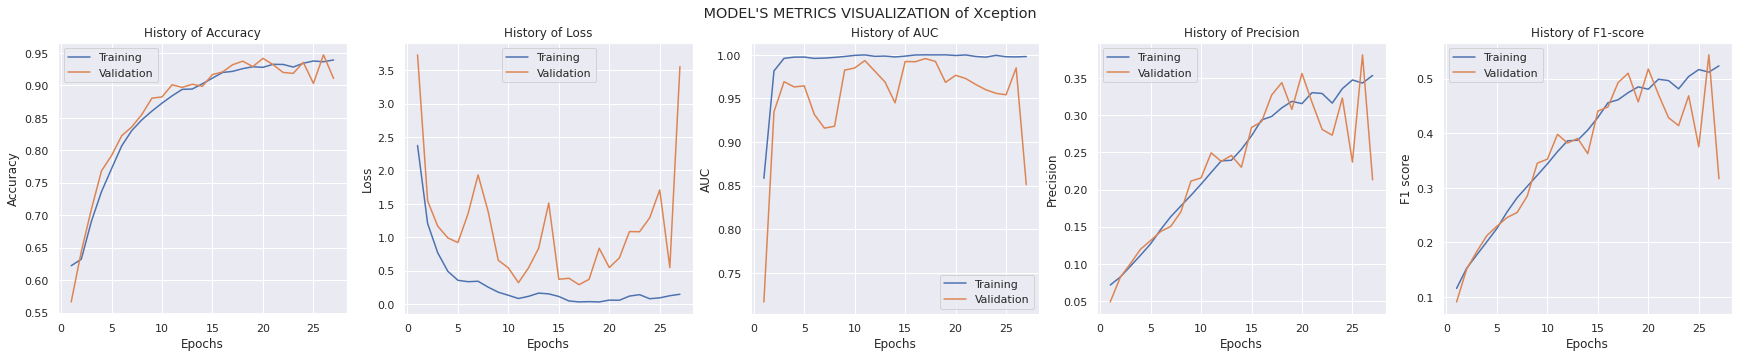

<Figure size 432x288 with 0 Axes>

In [284]:
lst = ['NASNetLarge','ResNet','VGG-19','Inception','Xception']
for i in range(len(lst)):
  history = hist_list[i]
  Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
              history.history['precision'],history.history['val_precision'],
               history.history['get_f1_score'],history.history['val_get_f1_score'],lst[i]
              )


###6.2 Loading the Pre-Trained Model to check the results on Test Data

In [1]:
Xception_load = tf.keras.models.load_model('IP/IP_Data/Original/modelXception.h5', custom_objects={"get_f1_score": get_f1_score })

NameError: name 'tf' is not defined

In [286]:
Inception_load = tf.keras.models.load_model('IP/IP_Data/Original/modelInceptionV3.h5', custom_objects={"get_f1_score": get_f1_score })

In [287]:
ResNet_load = tf.keras.models.load_model('IP/IP_Data/Original/modelRes.h5', custom_objects={"get_f1_score": get_f1_score })

In [288]:
VGG_load = tf.keras.models.load_model('IP/IP_Data/Original/modelVGG.h5', custom_objects={"get_f1_score": get_f1_score })

In [289]:
# EfficientNet_load=tf.keras.models.load_model('/content/drive/MyDrive/IP/IP_Data/Original/EfficientNet.h5', custom_objects={"get_f1_score": get_f1_score })

In [290]:
# EfficientNetV2L_load=tf.keras.models.load_model('IP/IP_Data/Original/modelENV2L.h5', custom_objects={"get_f1_score": get_f1_score })

In [291]:
NASNet_load=tf.keras.models.load_model('IP/IP_Data/Original/modelNAS.h5', custom_objects={"get_f1_score": get_f1_score })

In [292]:
def get_test_metric(test_model):
  res = []
  res = test_model.evaluate(test_Dataset,verbose=2)
  return res

In [321]:
import sklearn as sk

In [330]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [335]:
def plot_cm(test_model):
    #Predicting the classes of images
    test_generator=test_Dataset
    predictions = test_model.predict_generator(test_generator)
    print('predictions shape:', predictions.shape)
    print('predictions:', predictions)

    # getting the labels

    pred_labels = list(np.argmax(predictions, axis=-1))

    # getting true labels
    true_labels = test_generator.classes

    # get the confusion plot

    cm = sk.metrics.confusion_matrix(true_labels, pred_labels)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(20,20))
    plt.grid(False)
    cm_display.plot(ax=ax)

plt.show()

In [320]:
type(test_Dataset)

keras.preprocessing.image.DirectoryIterator

In [293]:
res1 = get_test_metric(Xception_load)

12/12 - 14s - loss: 3.2260 - accuracy: 0.9155 - precision: 0.2298 - recall: 0.6526 - auc: 0.8550 - get_f1_score: 0.3414


In [1]:
plot_cm(Xception_load)

NameError: name 'plot_cm' is not defined

In [294]:
res2 = get_test_metric(Inception_load)

12/12 - 15s - loss: 1.2081 - accuracy: 0.8824 - precision: 0.2039 - recall: 0.8711 - auc: 0.9436 - get_f1_score: 0.3311


In [295]:
res3 = get_test_metric(ResNet_load)

12/12 - 14s - loss: 1.4159 - accuracy: 0.8976 - precision: 0.2284 - recall: 0.8711 - auc: 0.9560 - get_f1_score: 0.3628


In [296]:
res4 = get_test_metric(VGG_load)

12/12 - 13s - loss: 2359.9165 - accuracy: 0.7668 - precision: 0.1206 - recall: 0.9526 - auc: 0.9340 - get_f1_score: 0.2146


In [297]:
# res5 = get_test_metric(EfficientNet_load)

In [298]:
# res6=get_test_metric(EfficientNetV2L_load)

In [299]:
res7=get_test_metric(NASNet_load)

12/12 - 21s - loss: 3.6741 - accuracy: 0.7202 - precision: 0.0378 - recall: 0.3026 - auc: 0.5074 - get_f1_score: 0.0670


In [300]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [301]:
# !unzip '/content/drive/MyDrive/IR/IR Project/Random_Test_Data/depression_set.zip'
# !unzip '/content/drive/MyDrive/IR/IR Project/Random_Test_Data/not_depression_set.zip'

In [302]:
import keras.utils as image

In [303]:
def process_image(image_path):
    img = Image.open(image_path)
    rgbimg = Image.new("RGB", img.size)
    rgbimg.paste(img)
    img = np.array(rgbimg).reshape(-1, 128, 128, 3)
    return img

In [304]:
# # image path
# img_path = '/content/depression_set/11.jpg' 

# # Load a single image
# new_image = process_image(img_path)

# # Check prediction
# predictions = (VGG_load.predict(new_image) > 0.5).astype("int32")


In [305]:
# predictions[0][0]

In [306]:
# img_path = '/content/not_depression_set/42.jpg' 

# # Load a single image
# new_image = process_image(img_path)

# # Check prediction
# predictions = (VGG_load.predict(new_image) > 0.5).astype("int32")

In [307]:
# predictions


###7. GRAD-CAM Visualisation

In [308]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

###Load the Model here.

In [309]:
model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"

In [310]:
import keras.utils as image

In [311]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [312]:
import keras.utils as image

In [314]:
# image path
img_path = 'IP/IP_Data/Original/test/Brassica Juncea (Indian Mustard)/BJ-S-003.jpg'   
new_image = tf.keras.utils.load_img(img_path)

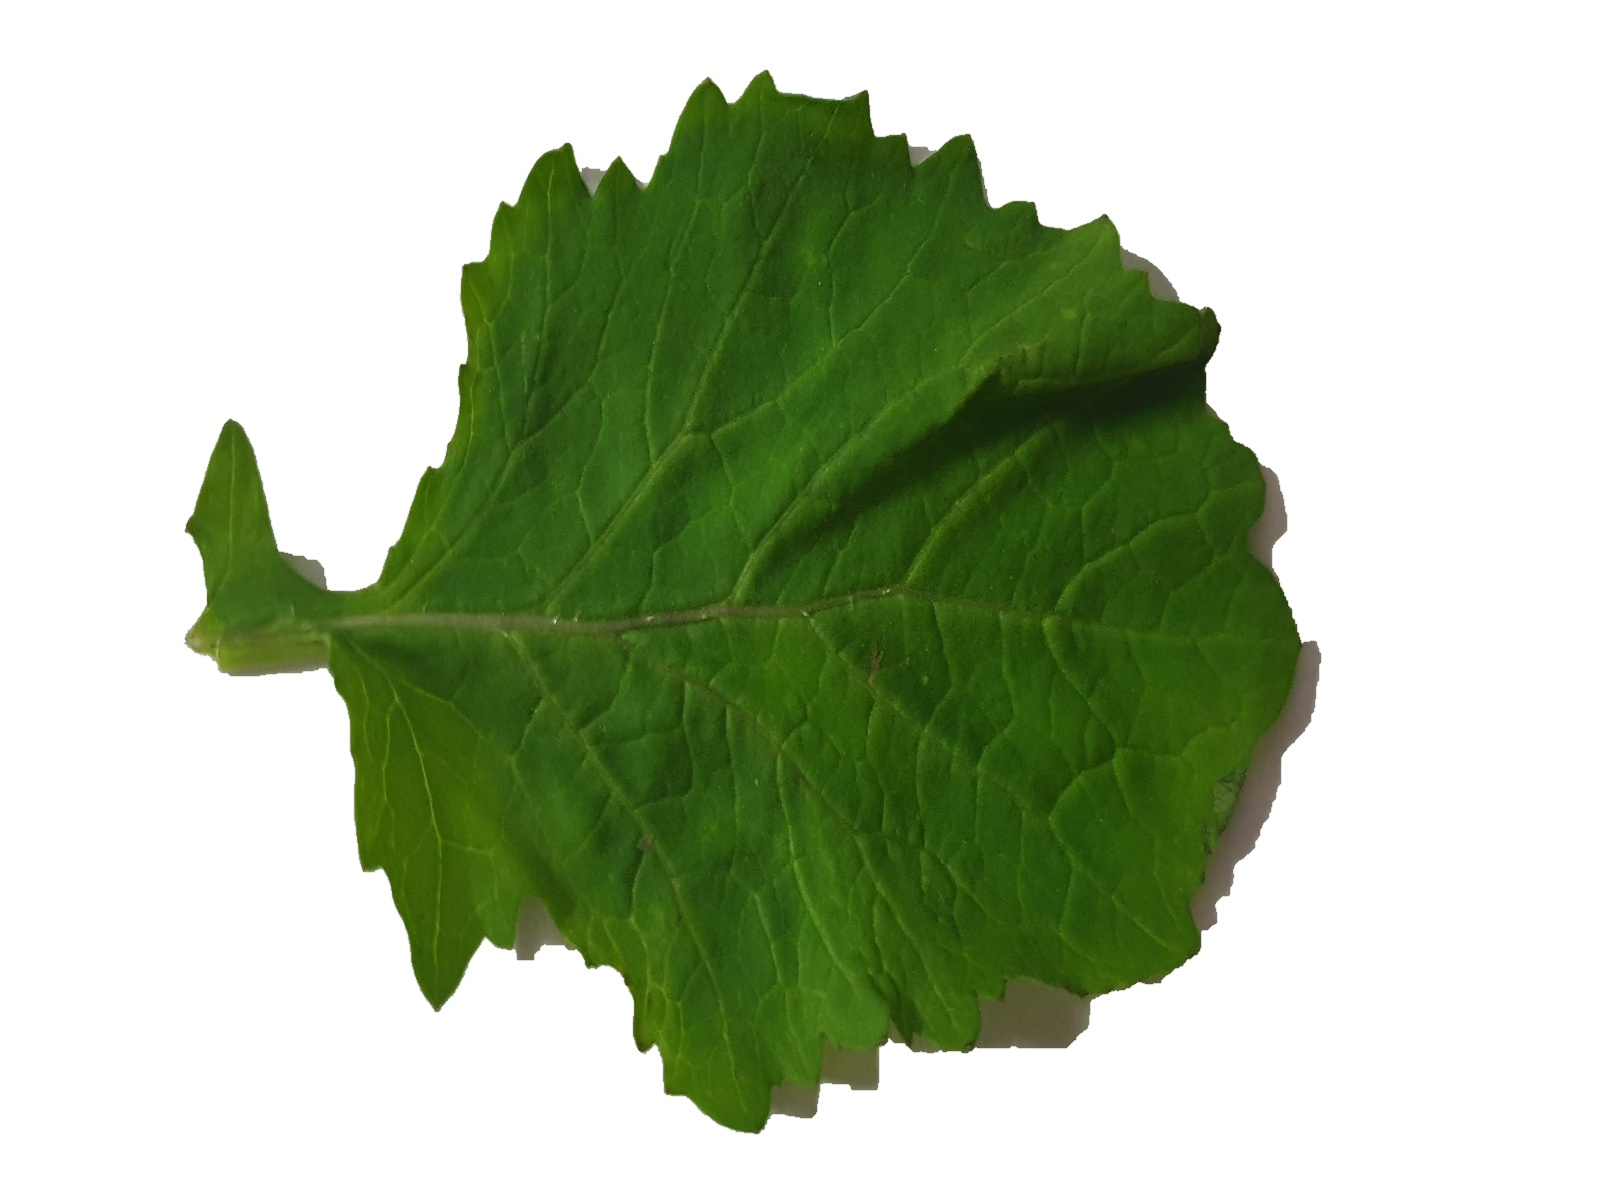

In [315]:
display(Image(img_path))

In [316]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

49152/35363 [=========================================] - 0s 1us/step
Predicted: [('n07714571', 'head_cabbage', 7.0398088)]


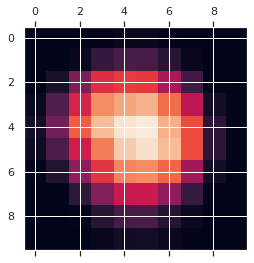

In [317]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

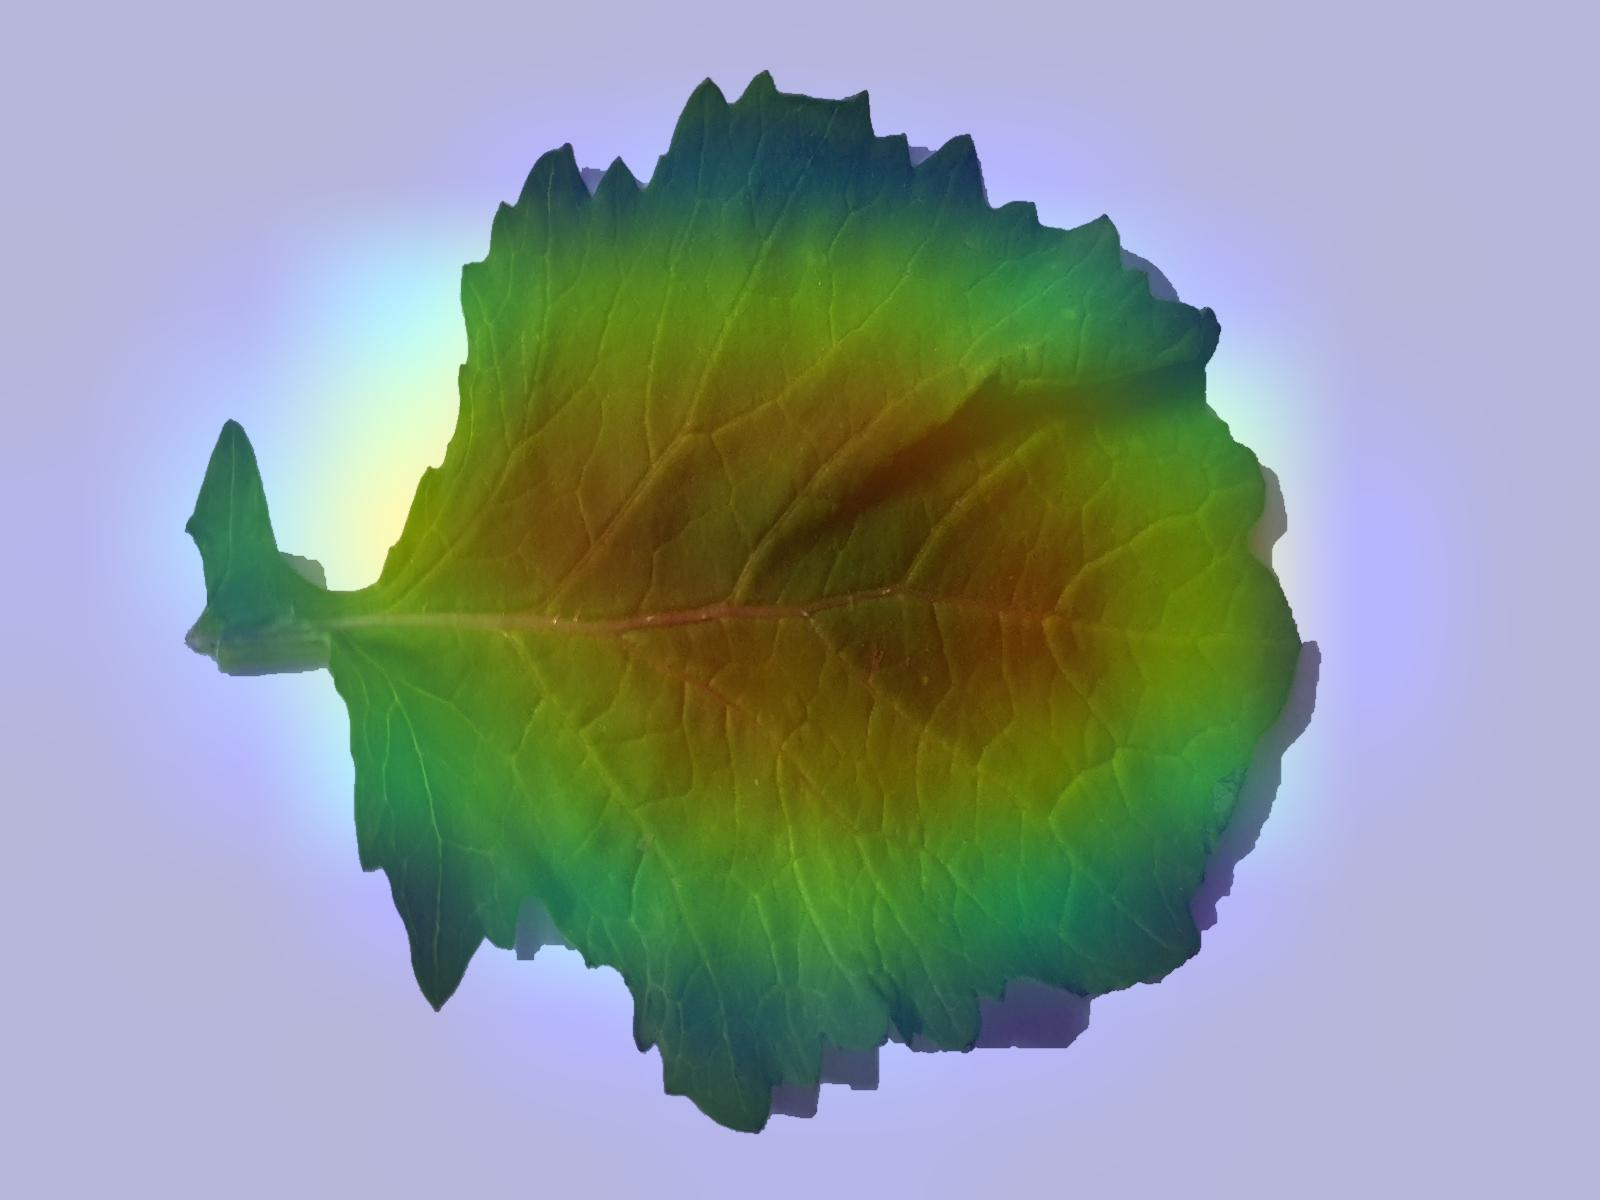

In [318]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()